# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

How to increase the SAT participation rate.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

%matplotlib inline

plt.style.use('fivethirtyeight')


## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
df_sat2017 = pd.read_csv('data/sat_2017.csv')

In [3]:
df_act2017 = pd.read_csv('data/ACT_2017-Average_Scores_by_State.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
df_sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
df_act2017.head(10)

,State,% of Graduates Tested ?,Average Composite Score,Average English Score,Average Mathematics Score,Average Reading Score,Average Science Score
0,Alabama,100,19.2,18.9,18.4,19.7,19.4
1,Alaska,65,19.8,18.7,19.8,20.4,19.9
2,Arizona,62,19.7,18.6,19.8,20.1,19.8
3,Arkansas,100,19.4,18.9,19.0,19.7,19.5
4,California,31,22.8,22.5,22.7,23.1,22.2
5,Colorado,100,20.8,20.1,20.3,21.2,20.9
6,Connecticut,31,25.2,25.5,24.6,25.6,24.6
7,Delaware,18,24.1,24.1,23.4,24.8,23.6
8,District of Columbia,32,24.2,24.4,23.5,24.9,23.5
9,Florida,73,19.8,19.0,19.4,21.0,19.4


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

#### 4a. Does the data look complete? 

Answer: Yes the data looks complete, with no null values and full entires for each index

In [6]:
df_act2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State                        52 non-null object
% of Graduates Tested ?      52 non-null int64
Average Composite Score      52 non-null float64
Average English Score        52 non-null float64
Average Mathematics Score    52 non-null float64
Average Reading Score        52 non-null float64
Average Science Score        52 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [7]:
df_sat2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: EBR&W max-644, min-482 math max-651, min-52

In [8]:
df_sat2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [9]:
df_sat2017[df_sat2017['Math'] == 52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


- The minimum Math score is not within the range for SATsections: 200–800, so it is possible that this might be a typo error
- ALso the total for Evidence-Based Reading and Writing and Math does not tally with Total column

In [10]:
df_sat2017['Math'][20] = df_sat2017['Total'][20] - df_sat2017['Evidence-Based Reading and Writing'][20]
df_sat2017[20:21]

C:\Users\cheng\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [11]:
df_sat2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,556.882353,1126.098039
std,45.666901,47.121395,92.494812
min,482.000000,468.000000,950.000000
25%,533.500000,523.500000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
#code
df_sat2017.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [13]:
df_act2017.dtypes

State                         object
% of Graduates Tested ?        int64
Average Composite Score      float64
Average English Score        float64
Average Mathematics Score    float64
Average Reading Score        float64
Average Science Score        float64
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The Participation for SAT 2017 was shown as a string when it should be an integer

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [14]:
df_sat2017['Participation'] = df_sat2017['Participation'].apply(lambda x : int(x.replace('%', '')))


- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [15]:
#code
df_sat2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


- Display the data types again to confirm they are correct.

In [16]:
#Code:
df_sat2017.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

Renaming each column

In [17]:
#code
df_sat2017.rename(columns={'Participation': 'pct Participation sat 17',
                          'Evidence-Based Reading and Writing':'ebrw sat 17',
                          'Math':'Math sat 17',
                           'Total':'Total sat 17'
                          }, inplace=True)


Changing the strings to lower cases and to replace spaces with _, easier for us to reference back to the columns when coding

In [18]:
df_sat2017.columns = df_sat2017.columns.str.lower()
df_sat2017.columns= df_sat2017.columns.str.replace(' ','_')


In [19]:
df_sat2017.head()

,state,pct_participation_sat_17,ebrw_sat_17,math_sat_17,total_sat_17
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [20]:
df_act2017.rename(columns={'% of Graduates Tested ?': 'pct Students Tested act 17',
                          'Average Composite Score':'Avg Composite act 17',
                          'Average English Score':'Avg English act 17',
                           'Average Mathematics Score':'Avg Math act 17',
                           'Average Reading Score':'Avg Reading act 17',
                           'Average Science Score': 'Avg Science act 17'
                          }, inplace=True)

In [21]:
df_act2017.columns = df_act2017.columns.str.lower()
df_act2017.columns= df_act2017.columns.str.replace(' ','_')


In [22]:
df_act2017.head()

,state,pct_students_tested_act_17,avg_composite_act_17,avg_english_act_17,avg_math_act_17,avg_reading_act_17,avg_science_act_17
0,Alabama,100,19.2,18.9,18.4,19.7,19.4
1,Alaska,65,19.8,18.7,19.8,20.4,19.9
2,Arizona,62,19.7,18.6,19.8,20.1,19.8
3,Arkansas,100,19.4,18.9,19.0,19.7,19.5
4,California,31,22.8,22.5,22.7,23.1,22.2


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

In [23]:
#include range for the description

|Feature|Type|Dataset|Description|
|---|---|---|---|
|Percentage of Students Tested|integer|ACT 17 & 18|Percentage of Students went for the test of the State (units in percentage ranges from 0 - 100)| 
|Average Composite Score|float|ACT 17 & 18|Average Composite Score of the State (ranges from 1 - 36)|
|Average English Score|float|ACT 17 & 18|Average English Score of the State(ranges from 1 - 36)|
|Average Math Score|float|ACT 17 & 18|Average Math Score of the State(ranges from 1 - 36)|
|Average Reading Score|float|ACT 17 & 18|Average Reading Score of the State(ranges from 1 - 36)|
|Average Science Score|float|ACT 17 & 18|Average Science Score of the State(ranges from 1 - 36)|
|Participation|integer|SAT 17 & 18|Participation rate for the test of the State (units in percentage ranges from 0 - 100)|
|Evidence-Based Reading and Writing|float|SAT 17 & 18|Average Evidence-Based Reading and Writing Score of the State (ranges from 200 - 800)|
|Math|float|SAT 17 & 18|Average Math Score of the State (ranges from 200 - 800)|
|Total|float|SAT 17 & 18|Average Total Score of the State (ranges from 400 - 1600)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [24]:
 #code
df_act2017.drop(df_act2017.index[51], inplace=True)

#contains an extra National row that df_sat2017 doesnt have

In [25]:
df_act2017.tail()

,state,pct_students_tested_act_17,avg_composite_act_17,avg_english_act_17,avg_math_act_17,avg_reading_act_17,avg_science_act_17
46,Virginia,29,23.8,23.5,23.3,24.6,23.5
47,Washington,29,21.9,20.9,21.9,22.1,22.0
48,West Virginia,69,20.4,20.0,19.4,21.2,20.5
49,Wisconsin,100,20.5,19.7,20.4,20.6,20.9
50,Wyoming,100,20.2,19.4,19.8,20.8,20.6


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [26]:
#Code:

combined_2017 = pd.merge(df_act2017, df_sat2017, how='left')


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [27]:
#code
combined_2017.head()

,state,pct_students_tested_act_17,avg_composite_act_17,avg_english_act_17,avg_math_act_17,avg_reading_act_17,avg_science_act_17,pct_participation_sat_17,ebrw_sat_17,math_sat_17,total_sat_17
0,Alabama,100,19.2,18.9,18.4,19.7,19.4,5,593,572,1165
1,Alaska,65,19.8,18.7,19.8,20.4,19.9,38,547,533,1080
2,Arizona,62,19.7,18.6,19.8,20.1,19.8,30,563,553,1116
3,Arkansas,100,19.4,18.9,19.0,19.7,19.5,3,614,594,1208
4,California,31,22.8,22.5,22.7,23.1,22.2,53,531,524,1055


In [28]:
combined_2017.to_csv('combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [29]:
df_sat2018 = pd.read_csv('data/sat_2018.csv')

In [30]:
df_sat2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [31]:
df_sat2018.info()
#check if any of the data types are wrong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [32]:
df_sat2018['Participation'] = df_sat2018['Participation'].apply(lambda x : int(x.replace('%', '')))
#replacing % with blank, then change the string to a float

In [33]:
df_sat2018.rename(columns={'Participation': 'pct Participation sat 18',
                          'Evidence-Based Reading and Writing':'ebrw sat 18',
                          'Math':'Math sat 18',
                           'Total':'Total sat 18'
                          }, inplace=True)

In [34]:
df_sat2018.columns = df_sat2018.columns.str.lower()
df_sat2018.columns= df_sat2018.columns.str.replace(' ','_')


In [35]:
df_sat2018.head()

,state,pct_participation_sat_18,ebrw_sat_18,math_sat_18,total_sat_18
0,Alabama,6,595,571,1166
1,Alaska,43,562,544,1106
2,Arizona,29,577,572,1149
3,Arkansas,5,592,576,1169
4,California,60,540,536,1076


In [36]:
df_act2018 = pd.read_csv('data/act_2018_updated.csv')

In [37]:
df_act2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [38]:
df_act2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
State                            51 non-null object
Percentage of Students Tested    51 non-null int64
Average Composite Score          51 non-null float64
Average English Score            51 non-null float64
Average Math Score               51 non-null float64
Average Reading Score            51 non-null float64
Average Science Score            51 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [39]:
df_act2018.rename(columns={'Percentage of Students Tested': 'pct Students Tested act 18',
                          'Average Composite Score':'Avg Composite act 18',
                          'Average English Score':'Avg English act 18',
                           'Average Math Score':'Avg Math act 18',
                           'Average Reading Score':'Avg Reading act 18',
                           'Average Science Score': 'Avg Science act 18'
                          }, inplace=True)

In [40]:
df_act2018.columns = df_act2018.columns.str.lower()
df_act2018.columns= df_act2018.columns.str.replace(' ','_')

In [41]:
df_act2018.head()

,state,pct_students_tested_act_18,avg_composite_act_18,avg_english_act_18,avg_math_act_18,avg_reading_act_18,avg_science_act_18
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [42]:
combined_2018 = pd.merge(df_act2018, df_sat2018, how='left')

In [43]:
combined_2018.to_csv('combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [44]:
final_csv = pd.merge(combined_2017, combined_2018, how='left')

In [45]:
final_csv.to_csv('final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [46]:
#Code:
final_csv.describe()

,pct_students_tested_act_17,avg_composite_act_17,avg_english_act_17,avg_math_act_17,avg_reading_act_17,avg_science_act_17,pct_participation_sat_17,ebrw_sat_17,math_sat_17,total_sat_17,pct_students_tested_act_18,avg_composite_act_18,avg_english_act_18,avg_math_act_18,avg_reading_act_18,avg_science_act_18,pct_participation_sat_18,ebrw_sat_18,math_sat_18,total_sat_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,21.519608,20.931373,21.182353,22.013725,21.450980,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.020695,2.353677,1.981989,2.067271,1.739353,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,17.800000,16.300000,18.000000,18.100000,18.200000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.800000,19.000000,19.400000,20.450000,19.950000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,21.400000,20.700000,20.900000,21.800000,21.300000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.600000,23.300000,23.100000,24.150000,23.200000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.500000,25.300000,26.000000,24.900000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [47]:
#code

def standard_deviation(list_of_numbers):
    mu = np.mean(list_of_numbers)
    #finds the mean of the list
    return np.sqrt(sum([(v-mu)**2 for v in list_of_numbers])/len(list_of_numbers))
    #finds the sum of the list of (v-mu)**2 then divides by len(list_of_numbers) - n




In [48]:
    
a = [1,2,3,4,5]
standard_deviation(a)

1.4142135623730951

In [49]:
np.std(a)

1.4142135623730951

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [50]:
#Code:

{col.name: standard_deviation(col) for col in [final_csv[i] for i in final_csv.columns if (final_csv[i].dtype=='float64') or (final_csv[i].dtype=='int64')] }

{'pct_students_tested_act_17': 31.824175751231806,
 'avg_composite_act_17': 2.000786081581989,
 'avg_english_act_17': 2.3304876369363363,
 'avg_math_act_17': 1.9624620273436781,
 'avg_reading_act_17': 2.0469029314842646,
 'avg_science_act_17': 1.7222161451443676,
 'pct_participation_sat_17': 34.92907076664508,
 'ebrw_sat_17': 45.21697020437866,
 'math_sat_17': 46.65713364485503,
 'total_sat_17': 91.58351056778743,
 'pct_students_tested_act_18': 33.745194881997506,
 'avg_composite_act_18': 2.0855261815801147,
 'avg_english_act_18': 2.4222536143202795,
 'avg_math_act_18': 2.015707255555717,
 'avg_reading_act_18': 2.145891884510421,
 'avg_science_act_18': 1.8516885484833543,
 'pct_participation_sat_18': 36.946619223539415,
 'ebrw_sat_18': 47.03460978357609,
 'math_sat_18': 47.30194550378352,
 'total_sat_18': 93.22742384464433}

In [51]:
stdv_dict = {}

for x in final_csv.columns[1:]:
    stdv_dict[x] = standard_deviation(final_csv[x])

stdv_dict

#checking against a normal for loop

{'pct_students_tested_act_17': 31.824175751231806,
 'avg_composite_act_17': 2.000786081581989,
 'avg_english_act_17': 2.3304876369363363,
 'avg_math_act_17': 1.9624620273436781,
 'avg_reading_act_17': 2.0469029314842646,
 'avg_science_act_17': 1.7222161451443676,
 'pct_participation_sat_17': 34.92907076664508,
 'ebrw_sat_17': 45.21697020437866,
 'math_sat_17': 46.65713364485503,
 'total_sat_17': 91.58351056778743,
 'pct_students_tested_act_18': 33.745194881997506,
 'avg_composite_act_18': 2.0855261815801147,
 'avg_english_act_18': 2.4222536143202795,
 'avg_math_act_18': 2.015707255555717,
 'avg_reading_act_18': 2.145891884510421,
 'avg_science_act_18': 1.8516885484833543,
 'pct_participation_sat_18': 36.946619223539415,
 'ebrw_sat_18': 47.03460978357609,
 'math_sat_18': 47.30194550378352,
 'total_sat_18': 93.22742384464433}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [52]:
final_csv.describe()
#checking against the value running with .describe()

,pct_students_tested_act_17,avg_composite_act_17,avg_english_act_17,avg_math_act_17,avg_reading_act_17,avg_science_act_17,pct_participation_sat_17,ebrw_sat_17,math_sat_17,total_sat_17,pct_students_tested_act_18,avg_composite_act_18,avg_english_act_18,avg_math_act_18,avg_reading_act_18,avg_science_act_18,pct_participation_sat_18,ebrw_sat_18,math_sat_18,total_sat_18
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,21.519608,20.931373,21.182353,22.013725,21.450980,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.020695,2.353677,1.981989,2.067271,1.739353,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083
min,8.000000,17.800000,16.300000,18.000000,18.100000,18.200000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.800000,19.000000,19.400000,20.450000,19.950000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,21.400000,20.700000,20.900000,21.800000,21.300000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.600000,23.300000,23.100000,24.150000,23.200000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.500000,25.300000,26.000000,24.900000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000


In [53]:
np.std(final_csv)
#checking against numpy's std method

pct_students_tested_act_17    31.824176
avg_composite_act_17           2.000786
avg_english_act_17             2.330488
avg_math_act_17                1.962462
avg_reading_act_17             2.046903
avg_science_act_17             1.722216
pct_participation_sat_17      34.929071
ebrw_sat_17                   45.216970
math_sat_17                   46.657134
total_sat_17                  91.583511
pct_students_tested_act_18    33.745195
avg_composite_act_18           2.085526
avg_english_act_18             2.422254
avg_math_act_18                2.015707
avg_reading_act_18             2.145892
avg_science_act_18             1.851689
pct_participation_sat_18      36.946619
ebrw_sat_18                   47.034610
math_sat_18                   47.301946
total_sat_18                  93.227424
dtype: float64

Answer: Yes it match up with the output from pandas describe and numpy's std method 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?

- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
       
- Do any states with 100% participation on a given test have a rate change year-to-year?

- Do any states show have >50% participation on *both* tests either year?


Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

- Which states have the highest and lowest participation rates for the:

- 2017 SAT?
    - Highest(100%): District of Columbia, Michigan, Connecticut, Delaware	
    - Lowest(2%): North Dakota, Mississippi, Lowa
- 2018 SAT?
    - Highest(100%): Colorado, Connecticut, Delaware, Michigan, Idaho
    - Lowest(2%): North Dakota

- Michigan, Connecticut remained as the highest participation rate in both 2017 & 2018
- North Dakota still remained in as the lowest participation rate at 2%

In [54]:
final_csv.sort_values(by=['pct_participation_sat_18']).loc[:,['state','pct_participation_sat_18']]
#displaying only 'pct_participation_sat_18' with lowest to highest

,state,pct_participation_sat_18
34,North Dakota,2
50,Wyoming,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3
24,Mississippi,3
15,Iowa,3
44,Utah,4
23,Minnesota,4
18,Louisiana,4


In [55]:
final_csv.sort_values(by=['pct_participation_sat_17']).loc[:,['state','pct_participation_sat_17']]
#displaying only 'pct_participation_sat_17' with lowest to highest

,state,pct_participation_sat_17
34,North Dakota,2
24,Mississippi,2
15,Iowa,2
25,Missouri,3
44,Utah,3
41,South Dakota,3
27,Nebraska,3
49,Wisconsin,3
23,Minnesota,3
50,Wyoming,3


- Which states have the highest and lowest participation rates for the:

- 2017 ACT?
    - Highest(100%): Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Nevada, North Carolina, Montana, Mississippi,  Minnesota, Louisiana, Missouri, Wyoming, Colorado, Arkansas
    - Lowest(8%): Maine
- 2018 ACT?
    - Highest(100%): Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, Nevada, North Carolina, Nebraska, Montana, Mississippi, Louisiana, Missouri, Wyoming, Arkansas
    - Lowerst(7%): Maine
    
- All of the countries with the highest participation rate in 2017 remained as the highest in 2018 as well
- Maine still remained as the lowest and even decreased by 1%

In [56]:
final_csv.sort_values(by=['pct_students_tested_act_17']).loc[:,['state','pct_students_tested_act_17']]

,state,pct_students_tested_act_17
19,Maine,8
29,New Hampshire,18
7,Delaware,18
39,Rhode Island,21
38,Pennsylvania,23
20,Maryland,28
45,Vermont,29
21,Massachusetts,29
22,Michigan,29
46,Virginia,29


In [57]:
final_csv.sort_values(by=['pct_students_tested_act_18']).loc[:,['state','pct_students_tested_act_18']]

,state,pct_students_tested_act_18
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20
22,Michigan,22
47,Washington,24
45,Vermont,24
46,Virginia,24
21,Massachusetts,25


- Which states have the highest and lowest mean total scores for the:

- 2017 SAT?
    - Highest: Minnesota (647.5)
    - Lowest: District of Columbia (475.0)
- 2018 SAT?
    - Highest: Minnesota (649)
    - Lowest: District of Columbia (488.5)
    
- Both highest and lowest countries remained, but with their average scores increased

In [58]:
final_csv['total_mean_sat_18'] = final_csv['total_sat_18']/2

In [59]:
final_csv.sort_values(by=['total_mean_sat_18']).loc[:,['state','total_mean_sat_18']]

,state,total_mean_sat_18
8,District of Columbia,488.5
7,Delaware,499.0
48,West Virginia,499.5
12,Idaho,500.5
44,Utah,505.0
11,Hawaii,505.0
22,Michigan,505.5
19,Maine,506.5
39,Rhode Island,509.0
13,Illinois,509.5


In [60]:
final_csv['total_mean_sat_17'] = final_csv['total_sat_17']/2

In [61]:
final_csv.sort_values(by=['total_mean_sat_17']).loc[:,['state','total_mean_sat_17']]

,state,total_mean_sat_17
8,District of Columbia,475.0
7,Delaware,498.0
12,Idaho,502.5
22,Michigan,502.5
19,Maine,506.0
9,Florida,508.5
43,Texas,510.0
6,Connecticut,520.5
36,Oklahoma,523.5
10,Georgia,525.0


- Which states have the highest and lowest mean composite scores for the:
- 2017 ACT?
    - Highest: New Hampshire (25.5)
    - Lowest: Nevada (17.8)
- 2018 ACT?
    - Highest: Connecticut (23.9)
    - Lowest: Nevada (19.9)
    
- Highest mean total score changed state but lowest mean total score date remained the same

In [62]:
final_csv.sort_values(by=['avg_composite_act_17']).loc[:,['state','avg_composite_act_17']]

,state,avg_composite_act_17
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1
0,Alabama,19.2
3,Arkansas,19.4
36,Oklahoma,19.4
18,Louisiana,19.5
2,Arizona,19.7


In [63]:
final_csv.sort_values(by=['avg_composite_act_18']).loc[:,['state','avg_composite_act_18']]

,state,avg_composite_act_18
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1
33,North Carolina,19.1
2,Arizona,19.2
18,Louisiana,19.2
36,Oklahoma,19.3
3,Arkansas,19.4


Do any states with 100% participation on a given test have a rate change year-to-year?
    - SAT: Colorado, Idaho, District of Columbia
    - ACT: Colorado, Minnesota, Nebraska, Ohio

In [64]:
final_csv[((final_csv['pct_participation_sat_17'] == 100) & (final_csv['pct_participation_sat_18'] != 100)) | ((final_csv['pct_participation_sat_17'] != 100) & (final_csv['pct_participation_sat_18'] == 100))].loc[:, ['state','pct_participation_sat_17', 'pct_participation_sat_18']]

,state,pct_participation_sat_17,pct_participation_sat_18
5,Colorado,11,100
8,District of Columbia,100,92
12,Idaho,93,100


In [65]:
final_csv[((final_csv['pct_students_tested_act_17'] == 100) & (final_csv['pct_students_tested_act_18'] != 100)) | ((final_csv['pct_students_tested_act_17'] != 100) & (final_csv['pct_students_tested_act_18'] == 100))].loc[:, ['state','pct_students_tested_act_17', 'pct_students_tested_act_18']]

,state,pct_students_tested_act_17,pct_students_tested_act_18
5,Colorado,100,30
23,Minnesota,100,99
27,Nebraska,84,100
35,Ohio,75,100


Do any states show have >50% participation on both tests either year?
     - Calorado, Florida, Georgia, Hawaii, Illinois, North Carolina, South Carolina

In [66]:
final_csv[((final_csv['pct_participation_sat_17'] > 50) | (final_csv['pct_participation_sat_18'] > 50)) & ((final_csv['pct_students_tested_act_17'] > 50) | (final_csv['pct_students_tested_act_18'] > 50))].loc[:, ['state','pct_participation_sat_18','pct_students_tested_act_17', 'pct_students_tested_act_18','pct_participation_sat_17']]

,state,pct_participation_sat_18,pct_students_tested_act_17,pct_students_tested_act_18,pct_participation_sat_17
5,Colorado,100,100,30,11
9,Florida,56,73,66,83
10,Georgia,70,55,53,61
11,Hawaii,56,90,89,55
13,Illinois,99,93,43,9
33,North Carolina,52,100,100,49
40,South Carolina,55,100,100,50


Based on what you've just observed, have you identified any states that you're especially interested in? 
- Colorado has one of the lowest participation rate in SAT 2017, but topped the SAT 2018 participation rate, and their mean has dropped drastically from 600 - 519
    - This might be because SAT has been made compulsary from 2018 onwards
- Colorado also has one of the highest participation rate in ACT 2017 but dropped to one of the lowest in ACT 2018, but their average composite score has increased to above the National average composite score, from 20.8 to 23.9
    - It might be because they have made ACT conpulsary previously but only sent in their top 30% to ACT in 2018, therefore the increase in average composite score

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

PLotting heatmap to view the correlation between the different data points

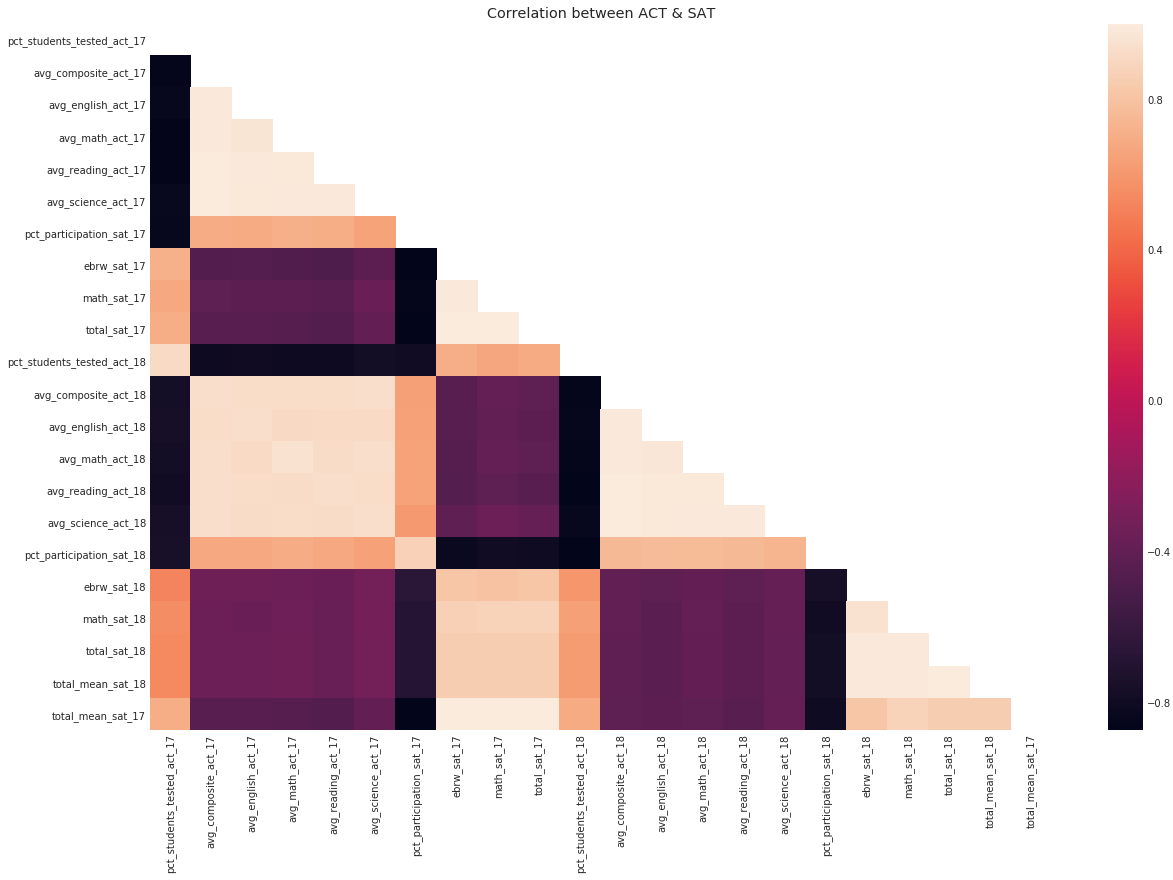

In [67]:
plt.figure(figsize=(18, 13))
final_corr = final_csv.corr()
mask = np.zeros_like(final_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    sns.heatmap(final_corr,mask=mask);
    plt.title('Correlation between ACT & SAT')

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [68]:

def subplot_histograms(dataframe, list_of_columns, list_of_titles, xlabel):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(16,13), sharey=True) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(xlabel)
        ax[i].set_ylabel('Number of States')
           # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
    - From the histogram, we can infer that SAT has more states that has 0 - 20% participation rate as compared to ACT for both years
    - Also ACT has more states that has 80 - 100% participation rate


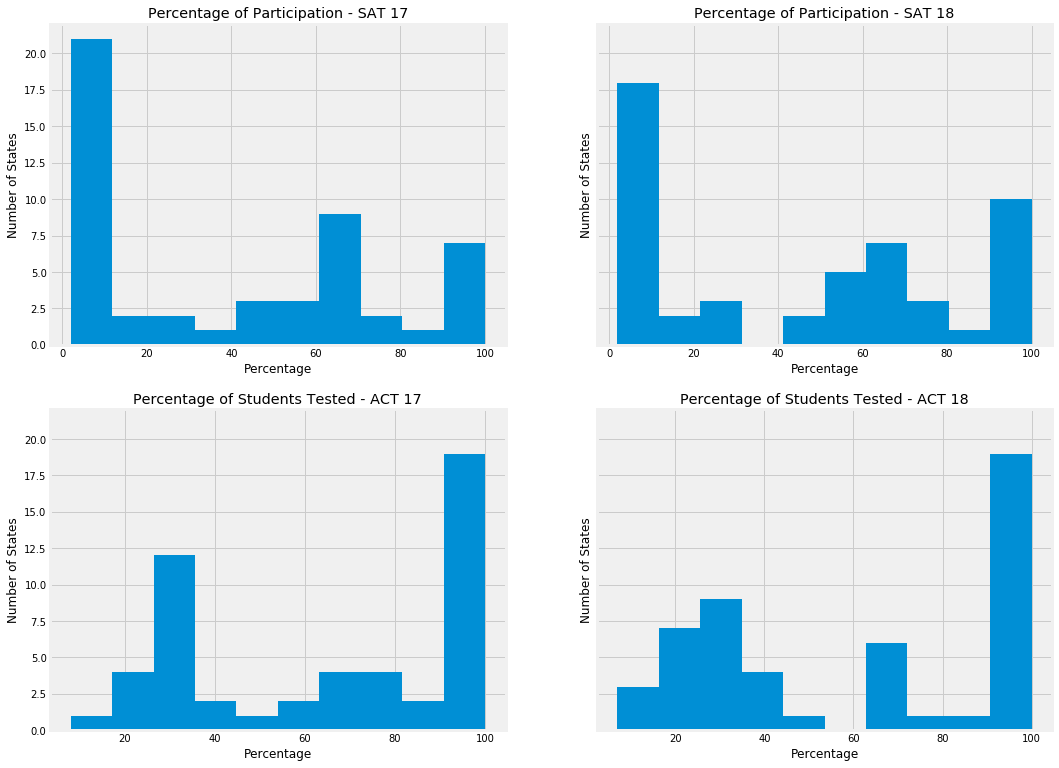

In [69]:
# Code

subplot_histograms(final_csv, ['pct_participation_sat_17','pct_participation_sat_18','pct_students_tested_act_17', 'pct_students_tested_act_18'], ['Percentage of Participation - SAT 17', 'Percentage of Participation - SAT 18','Percentage of Students Tested - ACT 17', 'Percentage of Students Tested - ACT 18'], 'Percentage')

- Math scores for SAT & ACT
    - Math Score for SAT looks left skewed
    - Average Math for ACT looks more M-curved

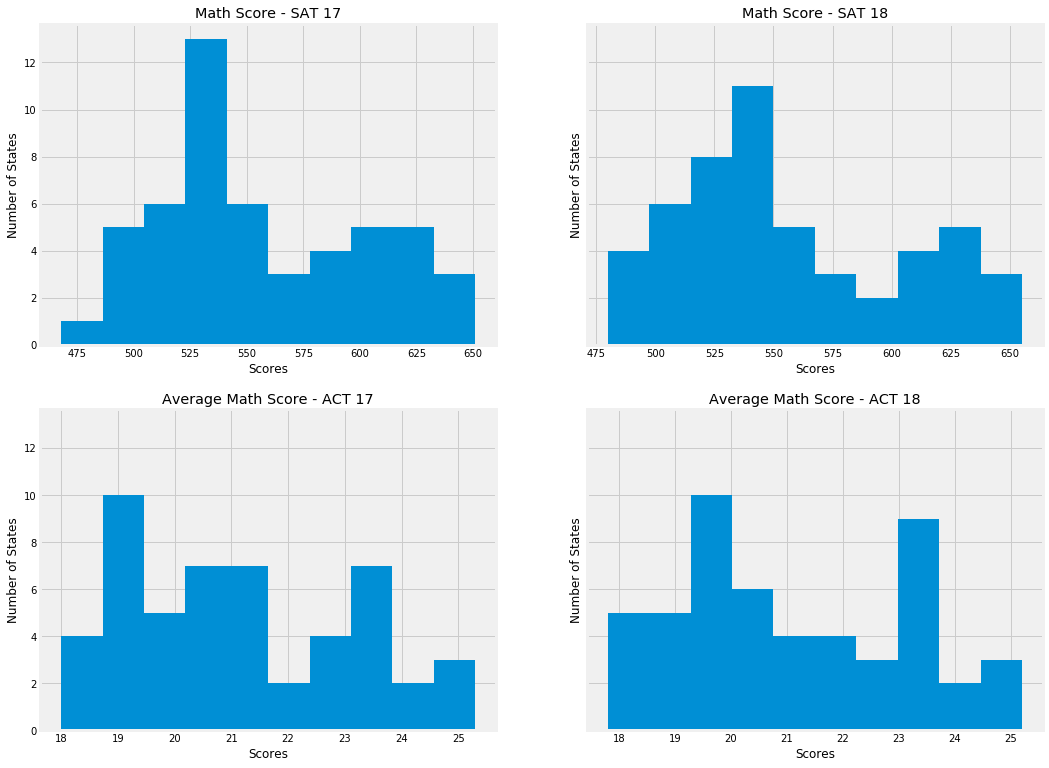

In [70]:
subplot_histograms(final_csv, ['math_sat_17','math_sat_18','avg_math_act_17','avg_math_act_18'], ['Math Score - SAT 17','Math Score - SAT 18','Average Math Score - ACT 17','Average Math Score - ACT 18'], 'Scores')

- Reading/verbal scores for SAT & ACT


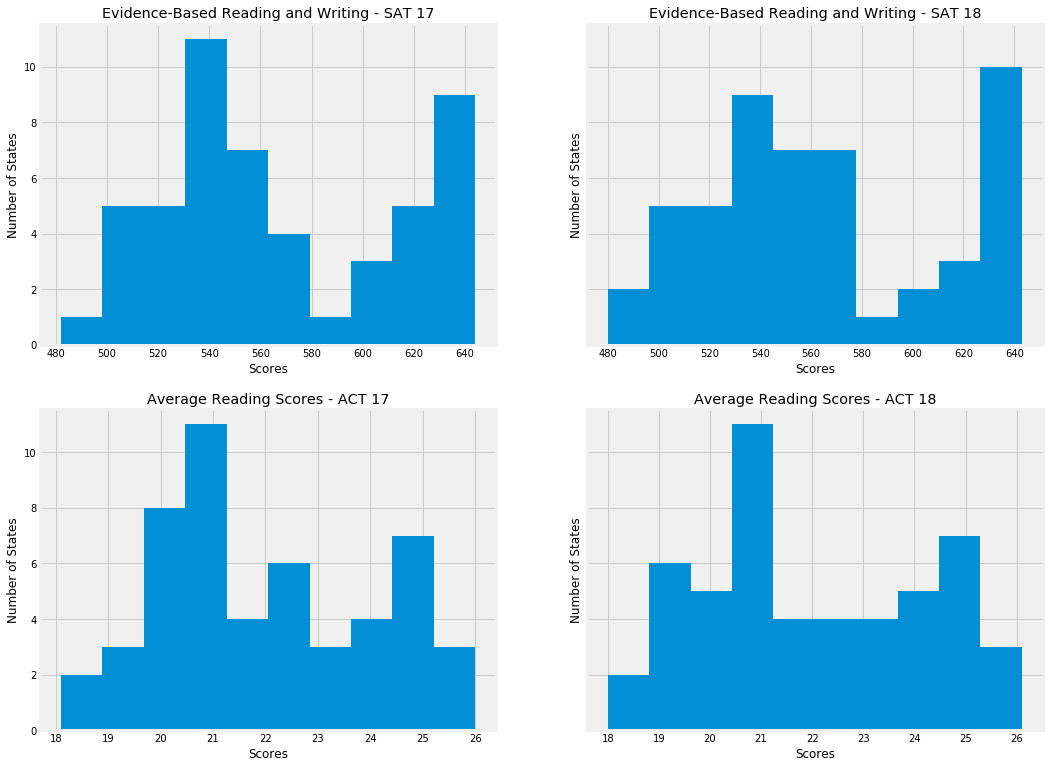

In [71]:
subplot_histograms(final_csv, ['ebrw_sat_17','ebrw_sat_18','avg_reading_act_17','avg_reading_act_18'], ['Evidence-Based Reading and Writing - SAT 17', 'Evidence-Based Reading and Writing - SAT 18','Average Reading Scores - ACT 17', 'Average Reading Scores - ACT 18'], 'Scores')

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [72]:
# Custome_function
#normalize data

def plotting_scatter(dataframe, x_value, y_value, xlabel, ylabel, title):
    plt.figure(figsize=(10,7))
    plt.scatter(x = dataframe[x_value], y = dataframe[y_value], color='red')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    
    # You'll want to specify your figsize
    


- SAT vs. ACT math scores for 2017
    - States with higher SAT math scores have a relatively lower ACT math scores.
    - It seems very unlikely to have a high score for both tests.
    - This might be because students are more focused on studying for certain test as it is mandatory in their state as compared to the other

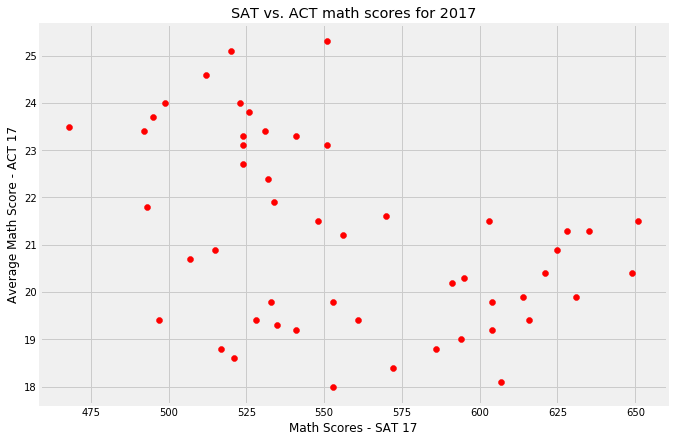

In [73]:
plotting_scatter(final_csv,'math_sat_17', 'avg_math_act_17', 'Math Scores - SAT 17','Average Math Score - ACT 17','SAT vs. ACT math scores for 2017')

- SAT vs. ACT verbal/reading scores for 2017
    - States with higher SAT Verbal/ Reading scores have a relatively lower ACT Verbal/ Reading scores.
    - It seems very unlikely to have a high score for both tests.
    - Students seems to perform better in Reading (ACT) than Math. 

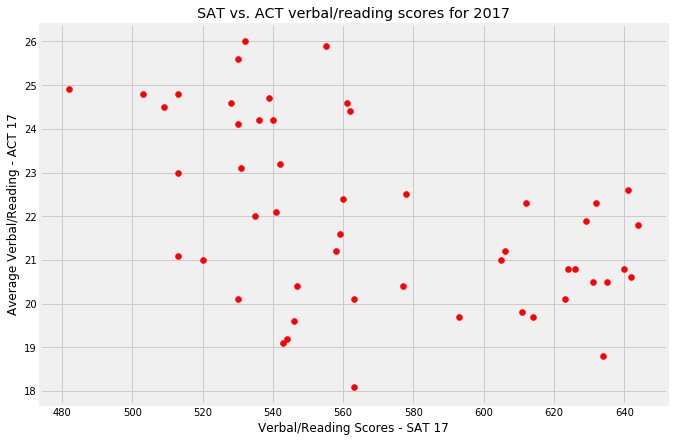

In [74]:
plotting_scatter(final_csv,'ebrw_sat_17', 'avg_reading_act_17', 'Verbal/Reading Scores - SAT 17','Average Verbal/Reading - ACT 17','SAT vs. ACT verbal/reading scores for 2017')

- SAT vs. ACT total/composite scores for 2017
    - Same relationship as the two scatter plots above.
    - It is most common to see students perform well for one test and not so well for another.

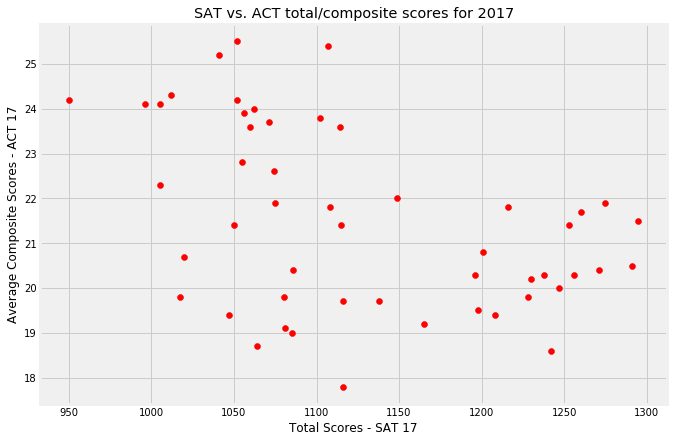

In [75]:
plotting_scatter(final_csv,'total_sat_17', 'avg_composite_act_17', 'Total Scores - SAT 17','Average Composite Scores - ACT 17','SAT vs. ACT total/composite scores for 2017')

- Total scores for SAT 2017 vs. 2018
    - Most of the scores got the same scores for SAT 2017 and SAT 2018, except for a few outliers.
 

In [76]:
# Custome_function
#normalize data

def plotting_regplot(dataframe, x_value, y_value, xlabel, ylabel, title):
    plt.figure(figsize=(10,7))
    sns.regplot(x = dataframe[x_value], y = dataframe[y_value], ci=False, scatter_kws={"s": 80,'color':'green'},line_kws={'lw':3, 'color':'blue'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
       


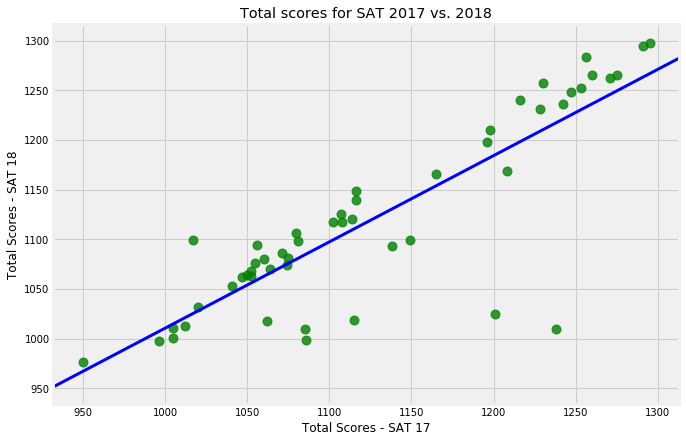

In [77]:
plotting_regplot(final_csv,'total_sat_17', 'total_sat_18', 'Total Scores - SAT 17','Total Scores - SAT 18','Total scores for SAT 2017 vs. 2018')

- Composite scores for ACT 2017 vs. 2018
    - The scores for ACT is more consistent than SAT, as the graph does not show as many outliers (mainly the 2 above the line)

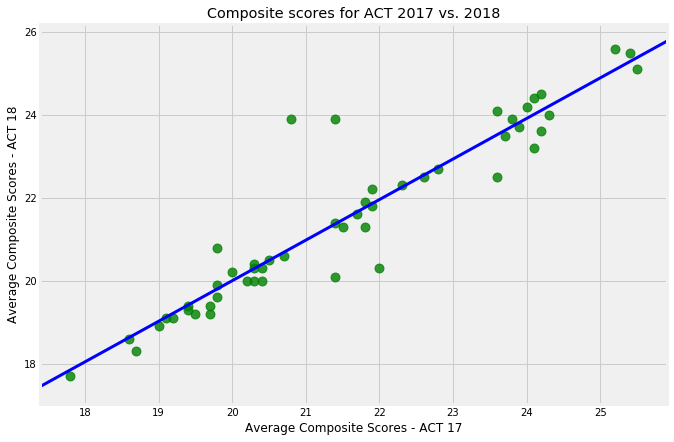

In [78]:
plotting_regplot(final_csv,'avg_composite_act_17', 'avg_composite_act_18', 'Average Composite Scores - ACT 17','Average Composite Scores - ACT 18','Composite scores for ACT 2017 vs. 2018')

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [79]:
# Code

def plotting_boxplot(df,list_of_values, title):
    plt.figure(figsize=(14,6))
    df.boxplot(column=list_of_values)
    plt.title(title)


- Percentage of Participation ACT vs SAT
    - The average participation for ACT is higher than SAT, which might mean that there are more students that took ACT than SAT.

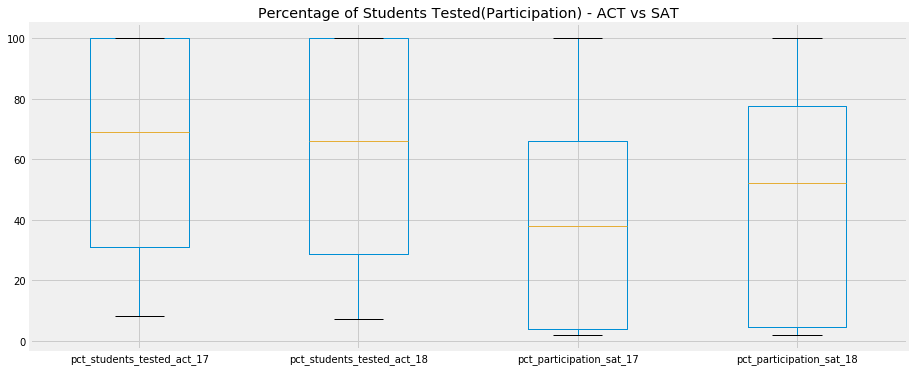

In [80]:
plotting_boxplot(final_csv,['pct_students_tested_act_17','pct_students_tested_act_18','pct_participation_sat_17','pct_participation_sat_18'],'Percentage of Students Tested(Participation) - ACT vs SAT')

- Total Score for SAT 2017 vs SAT 2017
    - There's a dlight decrease in the 75th percentile and mean, but the min and max has increased in 2018.

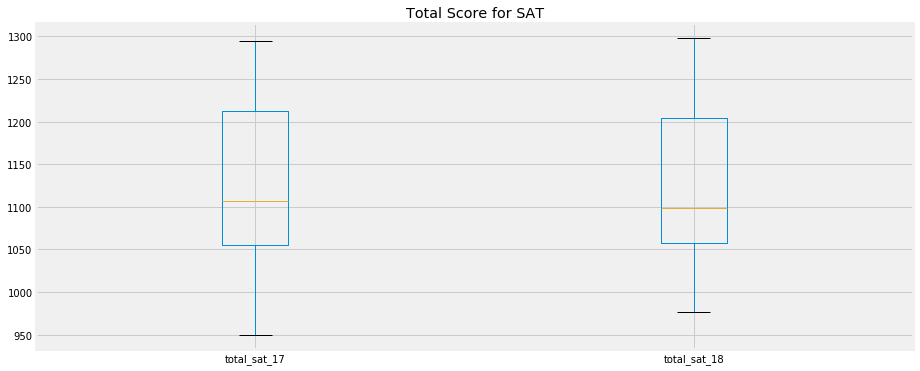

In [81]:
plotting_boxplot(final_csv, ['total_sat_17','total_sat_18'],'Total Score for SAT')

- Average Composite Score for ACT 2017 vs 2018
    - No significant change to the average composition score

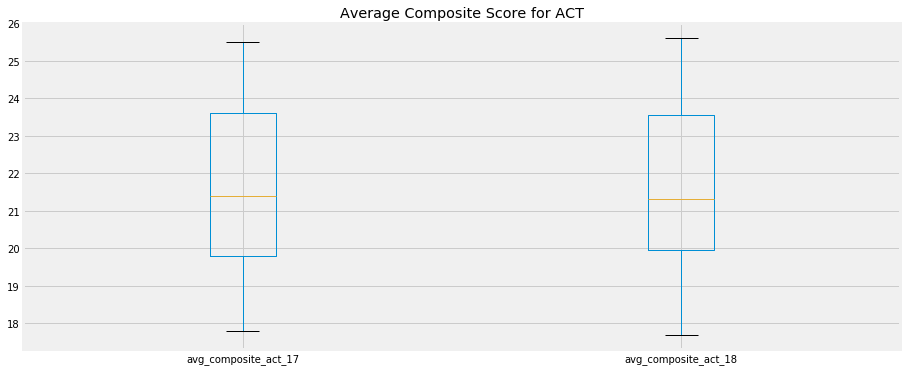

In [82]:
plotting_boxplot(final_csv,['avg_composite_act_17', 'avg_composite_act_18'],'Average Composite Score for ACT')

- Average scores for all subjects for ACT 2017
    - To see the performance of each subject in ACT 2017

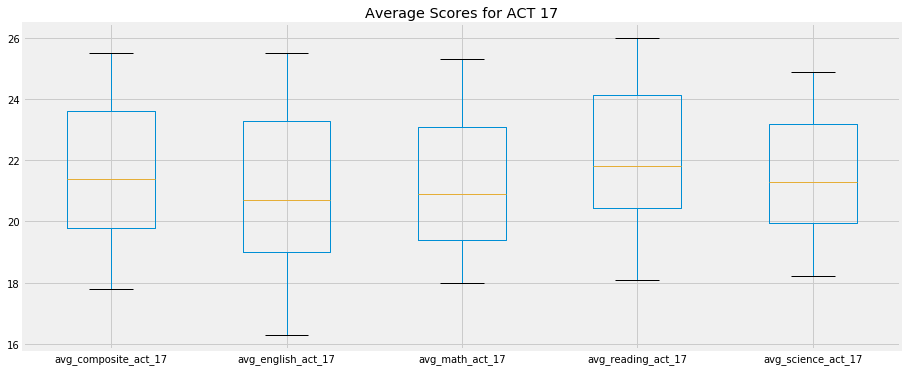

In [83]:
plotting_boxplot(final_csv,['avg_composite_act_17','avg_english_act_17','avg_math_act_17','avg_reading_act_17','avg_science_act_17'], 'Average Scores for ACT 17')

- Average scores for all subjects for ACT 2018
    - To see the performance of each subject in ACT 2018

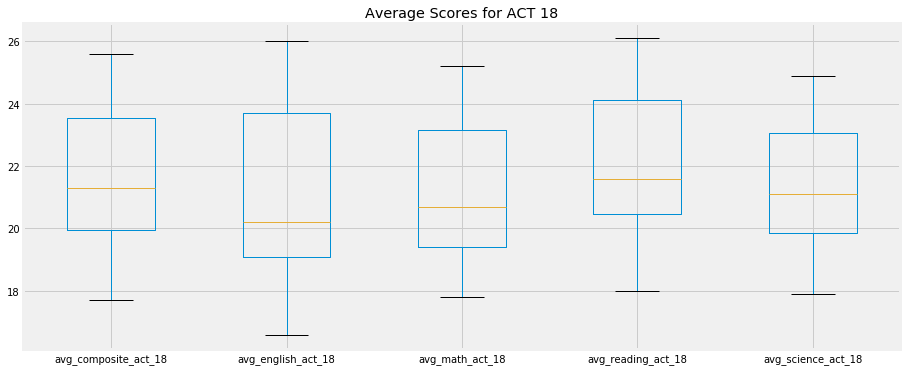

In [84]:
plotting_boxplot(final_csv,['avg_composite_act_18','avg_english_act_18','avg_math_act_18','avg_reading_act_18','avg_science_act_18'], 'Average Scores for ACT 18')

- Average scores for all subjects for SAT 2017 & 2018
    - To see the performance of each subject in SAT 2017 & 2018

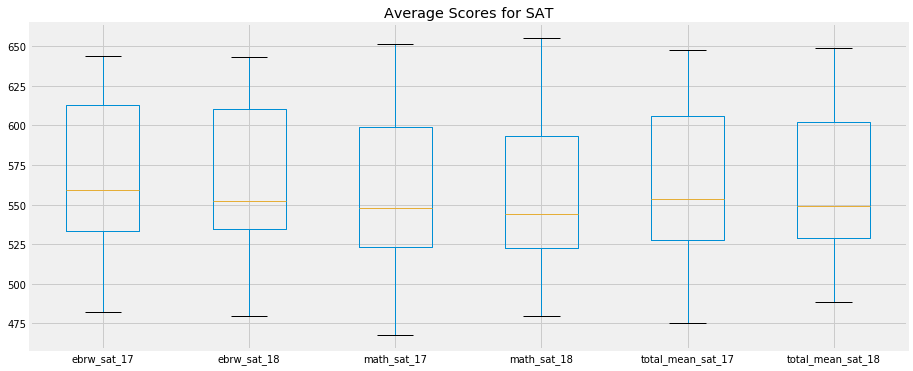

In [85]:
plotting_boxplot(final_csv, ['ebrw_sat_17', 'ebrw_sat_18','math_sat_17','math_sat_18','total_mean_sat_17','total_mean_sat_18'], 'Average Scores for SAT')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers: As the dataframe size is more than 50, we can apply Central Limit Theorem to it and assume that they are normally distributed to have a quick summary of their underlying distributions:

In [86]:
pd.set_option('display.max_columns', 500)
final_csv.describe()

,pct_students_tested_act_17,avg_composite_act_17,avg_english_act_17,avg_math_act_17,avg_reading_act_17,avg_science_act_17,pct_participation_sat_17,ebrw_sat_17,math_sat_17,total_sat_17,pct_students_tested_act_18,avg_composite_act_18,avg_english_act_18,avg_math_act_18,avg_reading_act_18,avg_science_act_18,pct_participation_sat_18,ebrw_sat_18,math_sat_18,total_sat_18,total_mean_sat_18,total_mean_sat_17
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,21.519608,20.931373,21.182353,22.013725,21.450980,39.803922,569.117647,556.882353,1126.098039,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,45.745098,563.686275,556.235294,1120.019608,560.009804,563.049020
std,32.140842,2.020695,2.353677,1.981989,2.067271,1.739353,35.276632,45.666901,47.121395,92.494812,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,37.314256,47.502627,47.772623,94.155083,47.077541,46.247406
min,8.000000,17.800000,16.300000,18.000000,18.100000,18.200000,2.000000,482.000000,468.000000,950.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,480.000000,480.000000,977.000000,488.500000,475.000000
25%,31.000000,19.800000,19.000000,19.400000,20.450000,19.950000,4.000000,533.500000,523.500000,1055.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.500000,534.500000,522.500000,1057.500000,528.750000,527.750000
50%,69.000000,21.400000,20.700000,20.900000,21.800000,21.300000,38.000000,559.000000,548.000000,1107.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,52.000000,552.000000,544.000000,1098.000000,549.000000,553.500000
75%,100.000000,23.600000,23.300000,23.100000,24.150000,23.200000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,77.500000,610.500000,593.500000,1204.000000,602.000000,606.000000
max,100.000000,25.500000,25.500000,25.300000,26.000000,24.900000,100.000000,644.000000,651.000000,1295.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,643.000000,655.000000,1298.000000,649.000000,647.500000


In [87]:
final_csv.mode()

,state,pct_students_tested_act_17,avg_composite_act_17,avg_english_act_17,avg_math_act_17,avg_reading_act_17,avg_science_act_17,pct_participation_sat_17,ebrw_sat_17,math_sat_17,total_sat_17,pct_students_tested_act_18,avg_composite_act_18,avg_english_act_18,avg_math_act_18,avg_reading_act_18,avg_science_act_18,pct_participation_sat_18,ebrw_sat_18,math_sat_18,total_sat_18,total_mean_sat_18,total_mean_sat_17
0,Alabama,100.0,19.8,19.0,19.4,20.1,20.5,3.0,513.0,524.0,1005.0,100.0,20.0,18.2,19.7,24.7,22.2,3.0,513.0,506.0,1010.0,505.0,502.5
1,Alaska,NaN,20.3,19.5,NaN,20.8,20.6,NaN,530.0,NaN,1052.0,NaN,20.3,19.8,20.3,NaN,23.4,4.0,547.0,530.0,1099.0,549.5,526.0
2,Arizona,NaN,21.4,21.2,NaN,NaN,20.9,NaN,NaN,NaN,1116.0,NaN,23.9,23.8,23.6,NaN,23.5,NaN,633.0,547.0,1117.0,558.5,558.0
3,Arkansas,NaN,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,618.0,1265.0,632.5,NaN
4,California,NaN,NaN,NaN,NaN,NaN,23.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,631.0,NaN,NaN,NaN
5,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Florida,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


pct_students_tested_act_17
- Central tendency:
    - Mean: 65.254902
    - Median: 69.000000
    - Mode: 100
- Spread: Standard deviation is at 32.140842, the range is from 8 - 100
- Shape/skewness: Right Skewed as mean < median(50%) 

avg_composite_act_17
- Central tendency:
    - Mean: 21.519608
    - Median: 21.400000
    - Mode: 19.8, 20.3, 21.4
- Spread: Standard deviation is at 2.020695, the range is from 16.3 to 25.5
- Shape/skewness: Normal Distribution with slight/minor left skew as mean is slightly > median

avg_english_act_17
- Central tendency:
    - Mean: 20.931373
    - Median: 20.7
    - Mode: 19, 19.5, 21.2
- Spread: Standard deviation is at 2.353677, the range is from 18 to 25.3 
- Shape/skewness: Normal Distribution with slight/minor left skew as mean is slightly > median

avg_math_act_17
- Central tendency: 
    - Mean: 21.182353
    - Median: 20.9
    - Mode: 19.4
- Spread: Standard deviation is at 1.981989, the range is from 18 to 25.3 
- Shape/skewness: Normal Distribution with slight/minor left skew as mean is slightly > median

avg_reading_act_17
- Central tendency:
    - Mean: 22.013725
    - Median: 21.8
    - Mode: 20.1, 20.8
- Spread: Standard deviation is at 2.067271, the range is from 18.1 to 26 
- Shape/skewness: Normal Distribution with slight/minor left skew as mean is slightly > median

avg_science_act_17
- Central tendency:
    - Mean: 21.45
    - Median: 21.3
    - Mode: 20.5, 20.6, 20.9, 22, 23.2
- Spread: Standard deviation is at 1.739353, the range is from 18.2 to 24.9 
- Shape/skewness: Normal Distribution with slight/minor left skew as mean is slightly > median

pct_participation_sat_17
- Central tendency: 
    - Mean: 39.803922
    - Median: 38
    - Mode: 3
- Spread: Standard deviation is at 35.276632, the range is from 2 to 100
- Shape/skewness: Normal Distribution with slight/minor left skew as mean is slightly > median

ebrw_sat_17
- Central tendency:
    - Mean: 569.117647
    - Median: 559
    - Mode: 513, 530
- Spread: Standard deviation is at 45.666901, the range is from 482 to 644
- Shape/skewness: Left Skewed as mean > median

math_sat_17	
- Central tendency:
    - Mean: 556.882353
    - Median: 548 
    - Mode: 524
- Spread: Standard deviation is at 47.121395, the range is from 468 to 651 
- Shape/skewness: Left Skewed as mean > median

total_sat_17	
- Central tendency:
    - Mean: 1126.098039
    - Median: 1107
    - Mode: 1005, 1052, 1116
- Spread: Standard deviation is at 92.494812, the range is from 950 to 1295
- Shape/skewness: Left Skewed as mean > median

pct_students_tested_act_18	
- Central tendency:
    - Mean: 61.647059
    - Median: 66
    - Mode: 100
- Spread: Standard deviation is at 34.080976, the range is from 7 to 100
- Shape/skewness: Right Skewed as mean < median

avg_composite_act_18	
- Central tendency:
    - Mean: 21.48625
    - Median: 21.3
    - Mode: 20, 20.3, 23.9
- Spread: Standard deviation at 2.106278, the range is from 17.7 to 25.6 
- Shape/skewness: Normal Distribution with slight/minor left skew as mean is slightly > median

avg_english_act_18	
- Central tendency:
    - Mean: 20.988235 
    - Median: 20.3
    - Mode: 18.2, 19.8, 23.8
- Spread: Standard deviation is at 2.446356, the range is from 16.6 to 26 
- Shape/skewness: Normal Distribution with slight/minor left skew as mean is slightly > median

avg_math_act_18	
- Central tendency:
    - Mean: 21.12549
    - Median: 20.7
    - Mode: 19.7, 20.3, 23.6
- Spread: Standard deviation is at 2.035765, the range is from 17.8 to 25.2 
- Shape/skewness: Normal Distribution with slight/minor left skew as mean is slightly > median 

avg_reading_act_18	
- Central tendency:
    - Mean: 22.015686
    - Median: 21.6
    - Mode: 24.7
- Spread: Standard deviation is at 2.167245, the range is from 18 to 26.1
- Shape/skewness: Normal Distribution with slight/minor left skew as mean is slightly > median

avg_science_act_18	
- Central tendency:
    - Mean: 21.345098
    - Median: 21.1
    - Mode: 22.2, 23.4, 23.5
- Spread: Standard deviation is at 1.870114, the range is from 17.9 to 24.9 
- Shape/skewness: Normal Distribution with slight/minor left skew as mean is slightly > median

pct_participation_sat_18	
- Central tendency:
    - Mean: 45.74508
    - Median: 52
    - Mode: 3, 4
- Spread: Standard deviation is at 37.314256, the range is from 2 to 100 
- Shape/skewness: Right skewed as mean is < median 

ebrw_sat_18	
- Central tendency:
    - Mean: 563.686275
    - Median: 610
    - Mode: 513, 547, 633
- Spread: Standard deviation is at 47.502627, the range is from 480 to 643 
- Shape/skewness: Right skewed as mean is < median 

math_sat_18
- Central tendency:
    - Mean: 556.235294
    - Median: 554
    - Mode: 506, 530, 547, 618, 631
- Spread: Standard deviation is at 47.772623, the range is from 480 to 655 
- Shape/skewness: Normal Distribution with slight left skew as mean is slightly > median 

total_sat_18
- Central tendency:
    - Mean: 1120.019608
    - Median: 1098
    - Mode: 1010, 1099, 1117, 1265
- Spread: Standard deviation is at 94.155083, with range of 977 to 1298 
- Shape/skewness: Left skewed as mean is > median 

#### We generally assume that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: Yes most of the samples are normally distributed with a slight left/ right skew

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: Yes for most Math and Reading as they have a smaller difference between the Mean and Median, but not so much for Rates as the difference is much bigger. This means that it is easier to make estimations for Math and Reading but not for Rates.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: Yes, given these specific data sets of SAT 2017 and ACT 2017, if we can make an assumption that all the people eligible to take SAT is eligible to take ACT, then it will make sense to conduct statistical inference because the population size will be the same considering all 51 states, this will imply that the aggregation and granularity are identical.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No, because range of scores are different - ACT range is 35, while SAT range is 400. So SAT's scores are more spread out as compared to ACT, which indicates that the quality of the tests are different. 

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

### Hypothesis test for 2018

$$ H_0: \mu_{\text{2017 SAT Participation rate}} = \mu_{\text{2017 ACT Participation rate}} $$
$$ H_A: \mu_{\text{2017 SAT Participation rate}} \ne \mu_{\text{2017 ACT Participation rate}} $$

### Hypothesis test for 2017

In [88]:
t_stat, p_value = stats.ttest_ind(final_csv['pct_participation_sat_17'],final_csv['pct_students_tested_act_17'])
(t_stat,p_value)

(-3.8085778908170544, 0.00024134203698662353)

$$ H_0: \mu_{\text{2018 SAT Participation rate}} = \mu_{\text{2018 ACT Participation rate}} $$
$$ H_A: \mu_{\text{2018 SAT Participation rate}} \ne \mu_{\text{2018 ACT Participation rate}} $$

### Hypothesis test for 2018

In [89]:
t_stat, p_value = stats.ttest_ind(final_csv['pct_participation_sat_18'],final_csv['pct_students_tested_act_18'])
(t_stat,p_value)

(-2.2471737667351626, 0.026826308222090527)

With the Hypothesis testing, we can see that SAT 2017 is significantly lower than ACT 2017 & SAT 2018 is also significantly lower than ACT 2018 at a 95% Confidence Interval.
But the difference in SAT and ACT participation rates has decreased from 2017 to 2018.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

1.	New York City (SAT 2017 – 67% to SAT 2018 – 79%)
    - In 2016- 2017, 250 school districts in multiple states administrated the SAT district-wide at no cost to students, and large school districts also participated in SAT School Day – where they can go for tests in schools with flexible dates to choose from (meaning they don’t have to only go down to the exam venue on Saturdays and pay $46 for registration)
    - New York City was the city that has the highest increase in SAT participation of 12% from 2017 – 2018. 
    - The SAT School Day scheme, and fee waiver has caused this drastic increase and would hope to see the percentage to increase in 2019 as they have extended the new initiative to the whole City instead of just the large school district.
    - https://chalkbeat.org/posts/ny/2018/01/11/record-number-of-new-york-city-students-take-sat-after-city-offers-test-for-free/

2.	Colorado (SAT 2017 – 11% to SAT 2018 – 100%)
    - We can see that the participation rate changed from 11% in 2017 to 100% in 2018.
    - This was because Colorado switched from offering the ACT to offering SAT to all juniors as of spring 2017.
    - hey also have the new initiative that students can now be administrated to the SAT test at no cost, they also adopted the SAT School Day.
    - https://reports.collegeboard.org/archive/sat-suite-program-results/2017/class-2017-results

3.	Hawaii (SAT 2017 – 55%, SAT 2018 – 56%)
    - Hawaii require all students to take the ACT with Writing (90% and 89% for ACT 2017 and 2018 respectively)
    - Although ACT is mandatory, only 33.8 percent of students who took the ACT were considered ready for college, which affected Hawaii's performance in the Best States ranking for college readiness (50.1%), which means more people who took the SAT tests are college ready therefore it pulled up the college readiness percent.
    - https://www.usnews.com/news/best-states/slideshows/the-10-states-where-students-are-the-most-prepared-for-college?slide=4

In [90]:
final_csv[(final_csv['state'] == 'Colorado') | (final_csv['state'] == 'New York') | (final_csv['state'] == 'Hawaii')]

,state,pct_students_tested_act_17,avg_composite_act_17,avg_english_act_17,avg_math_act_17,avg_reading_act_17,avg_science_act_17,pct_participation_sat_17,ebrw_sat_17,math_sat_17,total_sat_17,pct_students_tested_act_18,avg_composite_act_18,avg_english_act_18,avg_math_act_18,avg_reading_act_18,avg_science_act_18,pct_participation_sat_18,ebrw_sat_18,math_sat_18,total_sat_18,total_mean_sat_18,total_mean_sat_17
5,Colorado,100,20.8,20.1,20.3,21.2,20.9,11,606,595,1201,30,23.9,23.9,23.2,24.4,23.5,100,519,506,1025,512.5,600.5
11,Hawaii,90,19.0,17.8,19.2,19.2,19.3,55,544,541,1085,89,18.9,18.2,19.0,19.1,19.0,56,480,530,1010,505.0,542.5
32,New York,31,24.2,23.8,24.0,24.6,23.9,67,528,523,1052,27,24.5,24.2,24.2,24.9,24.2,79,534,534,1068,534.0,526.0


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Provide a suggestion for how the College Board might increase participation in states with low participation rate. Are there additional data you desire that would better inform your investigations?

### Conclusion

- To provide fee waiver & SAT School Day to the lower participating countries, excluding those states that require either ACT or SAT.

### Additional data desired

- List of mandatory tests in different states
- Information of students participated in SAT or ACT
    - Home income level
    - Willingness to participate
    - State they live in currently 
    

In [92]:
final_csv.sort_values(by=['pct_participation_sat_18'], ascending = False).loc[:,['state','pct_participation_sat_17', 'pct_participation_sat_18']]


,state,pct_participation_sat_17,pct_participation_sat_18
5,Colorado,11,100
6,Connecticut,100,100
7,Delaware,100,100
22,Michigan,100,100
12,Idaho,93,100
19,Maine,95,99
13,Illinois,9,99
39,Rhode Island,71,97
29,New Hampshire,96,96
8,District of Columbia,100,92
